In [1]:
"""
auth: Bryce R. Mc Williams
desc: a template for quick learning insights without the need for understanding variables
"""

import warnings
warnings.filterwarnings('ignore')

import pandas                        as pd
import numpy                         as np
import matplotlib.pyplot             as plt
%matplotlib inline
import seaborn                       as sns

from sklearn                         import preprocessing
from sklearn.preprocessing           import normalize,StandardScaler,label
from sklearn.model_selection         import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics                 import *

# ML Libraries

from sklearn.ensemble                import RandomForestClassifier
from sklearn.decomposition           import PCA
from xgboost                         import XGBClassifier
from sklearn.linear_model            import LogisticRegression
from lightgbm                        import LGBMClassifier
from sklearn.tree                    import DecisionTreeClassifier
from sklearn.neighbors               import KNeighborsClassifier

# Dataset

from sklearn                         import datasets

In [2]:
# Add datasets
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [3]:
# Check datasets
df_X  = pd.DataFrame(X)
df_y = pd.DataFrame(y)
print(df_X.head())
print(df_y.head())

      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     20     21      22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  
0  0.4601  0.11890  
1 

In [4]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
0     569 non-null float64
1     569 non-null float64
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
dtypes: float64(30)
memory usage: 133.5 KB


In [5]:
df_X.describe().T

,count,mean,std,min,25%,50%,75%,max
0,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
2,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
3,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
5,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
6,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
7,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
8,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
9,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df_X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.30, random_state=7,shuffle=True, stratify=df_y)

In [8]:
print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

        0      1       2      3        4        5         6         7   \
232  11.22  33.81   70.79  386.8  0.07780  0.03574  0.004967  0.006434   
99   14.42  19.77   94.48  642.5  0.09752  0.11410  0.093880  0.058390   
544  13.87  20.70   89.77  584.8  0.09578  0.10180  0.036880  0.023690   
133  15.71  13.93  102.00  761.7  0.09462  0.09462  0.071350  0.059330   
394  12.10  17.72   78.07  446.2  0.10290  0.09758  0.047830  0.033260   
..     ...    ...     ...    ...      ...      ...       ...       ...   
306  13.20  15.82   84.07  537.3  0.08511  0.05251  0.001461  0.003261   
203  13.81  23.75   91.56  597.8  0.13230  0.17680  0.155800  0.091760   
297  11.76  18.14   75.00  431.1  0.09968  0.05914  0.026850  0.035150   
322  12.86  13.32   82.82  504.8  0.11340  0.08834  0.038000  0.034000   
296  10.91  12.35   69.14  363.7  0.08518  0.04721  0.012360  0.013690   

         8        9   ...     20     21      22      23       24       25  \
232  0.1845  0.05828  ...  12.36  

In [9]:
# listing out the different ML Algorithms
models = []
models.append(('Random Forest with Entropy', RandomForestClassifier(criterion= "entropy", random_state= 111)))
models.append(('Random Forest with gini', RandomForestClassifier(criterion= "gini", random_state= 111)))
models.append(('XGBoost', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))
models.append(('DecisionTree with entropy', DecisionTreeClassifier(criterion= "entropy", random_state= 101)))
models.append(('DecisionTree with gini', DecisionTreeClassifier(criterion= "gini", random_state= 101)))
models.append(('Logistic Regression', LogisticRegression(random_state= 7)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))

In [10]:
# Predefined ROC Plot Function
def roc_plot(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return (plt.show())

In [11]:
# Checking with Multiple accuracy metrics and check for Overfitting
def all_models():
    model_list = pd.DataFrame(columns=("Model","Accuracy","F1Score","AUC"))
    rownumber = 0
    for name, model in models:
        #print(model)
        classifier = model
        classifier.fit(X_train, y_train)
        # prediction
        Y_predict = classifier.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_train, y_train, pos_label=None)
        print(fpr)
        print(tpr)
        roc_plot(fpr, tpr)
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"Accuracy"] = round(((accuracy_score(y_test,Y_predict))*100))
        model_list.loc[rownumber,"F1Score"]= round((f1_score(y_test,Y_predict)),2)
        model_list.loc[rownumber,"AUC"]= round((roc_auc_score(y_test,Y_predict)),2)
        Y_pt = classifier.predict(X_train)
        model_list.loc[rownumber,"Accuracy_Train"] = round(((accuracy_score(y_train,Y_pt))*100))
        model_list.loc[rownumber,"F1Score_Train"]= round((f1_score(y_train,Y_pt)),2)
        model_list.loc[rownumber,"AUC_Train"]= round((roc_auc_score(y_train,Y_pt)),2)
        rownumber += 1
    return (model_list.sort_values(by="AUC",ascending=False))

[0. 0. 1.]
[0. 1. 1.]


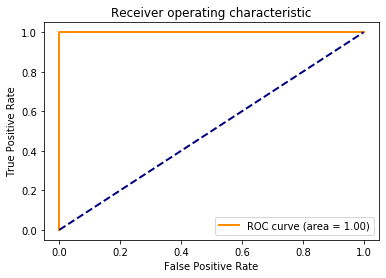

[0. 0. 1.]
[0. 1. 1.]


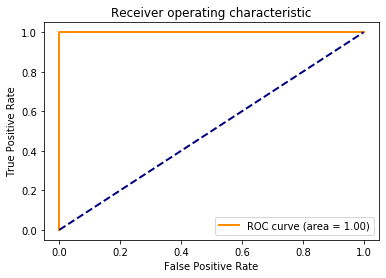

[0. 0. 1.]
[0. 1. 1.]


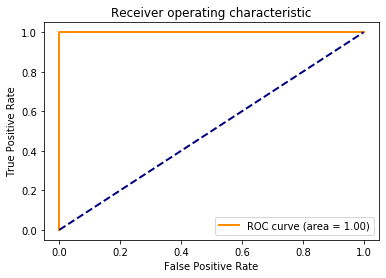

[0. 0. 1.]
[0. 1. 1.]


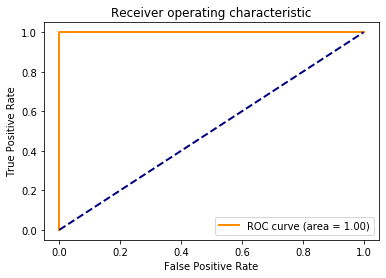

[0. 0. 1.]
[0. 1. 1.]


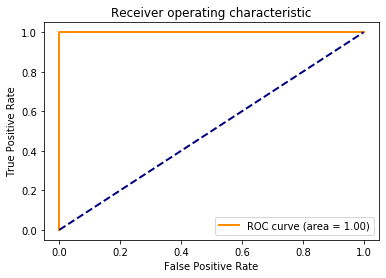

[0. 0. 1.]
[0. 1. 1.]


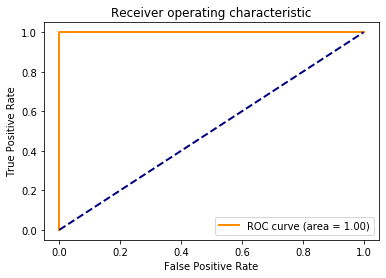

[0. 0. 1.]
[0. 1. 1.]


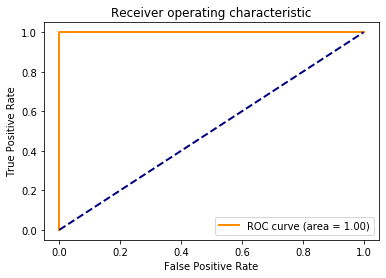

[0. 0. 1.]
[0. 1. 1.]


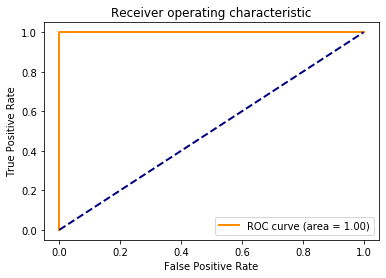

                        Model  Accuracy F1Score   AUC  Accuracy_Train  \
1     Random Forest with gini      98.0    0.98  0.98           100.0   
2                     XGBoost      97.0    0.98  0.97           100.0   
5      DecisionTree with gini      96.0    0.97  0.97           100.0   
0  Random Forest with Entropy      96.0    0.97  0.96           100.0   
3                        LGBM      96.0    0.97  0.96           100.0   
6         Logistic Regression      95.0    0.96  0.95            95.0   
4   DecisionTree with entropy      93.0    0.94  0.93           100.0   
7                         KNN      94.0    0.95  0.93            93.0   

   F1Score_Train  AUC_Train  
1           1.00       1.00  
2           1.00       1.00  
5           1.00       1.00  
0           1.00       1.00  
3           1.00       1.00  
6           0.96       0.95  
4           1.00       1.00  
7           0.95       0.92  


In [12]:
# Check for any overfitting
print (all_models())